In [1]:
from codecademySQL import sql_query
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [2]:
sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [3]:
sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [4]:
sql_query('''
SELECT *
FROM purchases
LIMIT 5
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [5]:
df = sql_query('''
SELECT visits.first_name,
       visits.last_name,visits.gender, visits.email,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'A' if pd.notnull(x) else 'B')
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A


In [7]:
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


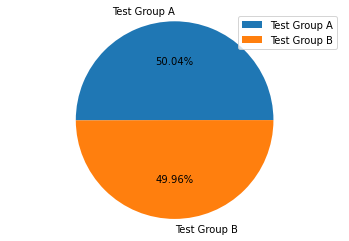

In [8]:
plt.pie(ab_counts.first_name, labels= ['Test Group A', 'Test Group B'], autopct='%0.2f%%')
plt.axis('equal')
plt.legend()
plt.savefig('AB test group pie chart')
plt.show()

In [9]:
df['is_application'] = df.application_date.apply(lambda app: 'Application' if pd.notnull(app) else 'No Application')
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A,No Application
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A,No Application
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A,No Application


In [10]:
app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()
app_counts

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


In [11]:
app_pivot = app_counts.pivot(columns= 'is_application', index= 'ab_test_group', values= 'first_name').reset_index()
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [12]:
app_pivot['Total'] = app_pivot.Application + app_pivot['No Application']

In [13]:
app_pivot['Percent with Application'] = app_pivot.Application / app_pivot.Total
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


In [14]:
from scipy.stats import chi2_contingency
contingency = [[250, 2254], [325, 2175]]
chi2_contingency(contingency)

(10.893961295282612,
 0.0009647827600722304,
 1,
 array([[ 287.72981615, 2216.27018385],
        [ 287.27018385, 2212.72981615]]))

In [15]:
df['is_member'] = df.purchase_date.apply(lambda pay: 'Member' if pd.notnull(pay) else 'Not Member')
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A,No Application,Not Member
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A,No Application,Not Member
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A,No Application,Not Member


In [16]:
just_apps = df[df.is_application == 'Application']
just_apps.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,male,SCardenas1980@gmail.com,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not Member
11,Valerie,Munoz,female,VMunoz1998@gmail.com,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,male,MB9820@gmail.com,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member


In [17]:
group_count = just_apps.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()
member_pivot =group_count.pivot(columns= 'is_member', index= 'ab_test_group', values= 'first_name')
member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total
member_pivot

is_member,Member,Not Member,Total,Percent Purchase
ab_test_group,,,,
A,200,50,250,0.800000
B,250,75,325,0.769231


In [18]:
contingency2 = [[200, 50], [250, 75]]
chi2_contingency(contingency2)

(0.615869230769231,
 0.43258646051083327,
 1,
 array([[195.65217391,  54.34782609],
        [254.34782609,  70.65217391]]))

In [19]:
member_count = df.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()
final_member_pivot = member_count.pivot(columns ='is_member', index ='ab_test_group', values='first_name')
final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total
final_member_pivot

is_member,Member,Not Member,Total,Percent Purchase
ab_test_group,,,,
A,200,2304,2504,0.079872
B,250,2250,2500,0.100000


In [20]:
contingency3 = [[200, 2304], [250, 2250]]
chi2_contingency(contingency3)

(5.949182292591156,
 0.014724114645783203,
 1,
 array([[ 225.17985612, 2278.82014388],
        [ 224.82014388, 2275.17985612]]))

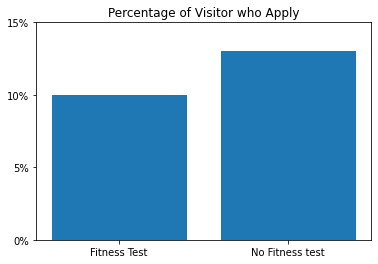

In [27]:
# Visitors who apply
ax = plt.subplot()
plt.bar(range(len(app_pivot)), app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(["Fitness Test", "No Fitness test"])
ax.set_yticks([0, 0.05, 0.10, 0.15])
ax.set_yticklabels(['0%', '5%', '10%', '15%'])
plt.title('Percentage of Visitor who Apply')
plt.savefig('Percentage who apply')
plt.show()

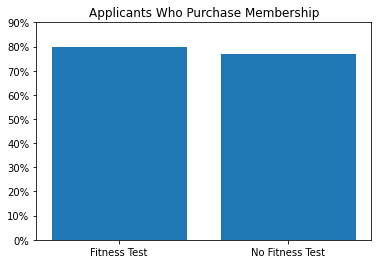

In [29]:
# applicants who purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)), member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'])
plt.title('Applicants Who Purchase Membership')
plt.savefig('applicants who purchase')
plt.show()

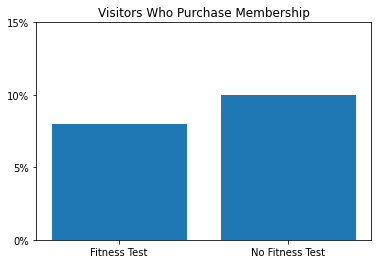

In [26]:
# Visitors who purchase
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)), final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(final_member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0,0.05, 0.10, 0.15])
ax.set_yticklabels(['0%', '5%', '10%', '15%'])
plt.title('Visitors Who Purchase Membership')
plt.savefig('visitors who purchase')
plt.show()